# Library

In [2]:
import pandas as pd
import numpy as np



# Data

In [3]:
def difference(data, interval):
    return [data[i] - data[i - interval] for i in range(interval, len(data))]


In [4]:
data = pd.read_csv('../dataset/upbit_ohlcv_1700.csv')

In [5]:
data.head()

,index,open,high,low,close,volume,value
0,2017-09-29 09:00:00+09:00,4586000.0,4709000.0,4476000.0,4657000.0,59.352373,2.724558e+08
1,2017-09-30 09:00:00+09:00,4657000.0,4896000.0,4651000.0,4895000.0,19.998483,9.561476e+07
2,2017-10-01 09:00:00+09:00,4889000.0,4978000.0,4682000.0,4962000.0,27.323332,1.331325e+08
3,2017-10-02 09:00:00+09:00,4962000.0,5095000.0,4956000.0,5025000.0,31.728004,1.599315e+08
4,2017-10-03 09:00:00+09:00,5021000.0,5079000.0,4811000.0,4964000.0,11.899307,5.890130e+07


<AxesSubplot:>

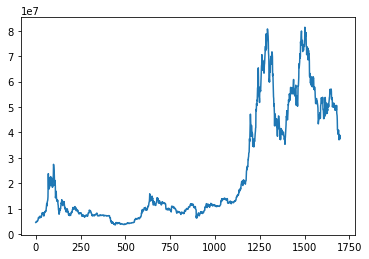

In [6]:
data['open'].plot()

<AxesSubplot:>

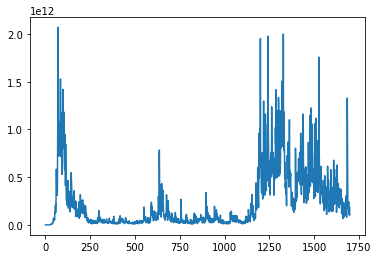

In [7]:
data['value'].plot()

In [13]:
torch.__version__

'1.11.0+cpu'

In [15]:
torch.cuda.is_available()

False

In [16]:
test_data = pd.DataFrame(
    dict(
        value=np.random.rand(30) - 0.5,
        group=np.repeat(np.arange(3), 10),
        time_idx=np.tile(np.arange(10), 3),
    )
)

In [17]:
test_data

,value,group,time_idx
0,0.134911,0,0
1,0.490473,0,1
2,0.423967,0,2
3,-0.043508,0,3
4,0.440712,0,4
5,0.417319,0,5
6,0.147742,0,6
7,-0.173836,0,7
8,0.322544,0,8
9,0.244919,0,9


In [18]:
from pytorch_forecasting import TimeSeriesDataSet

In [19]:
# create the dataset from the pandas dataframe
dataset = TimeSeriesDataSet(
    test_data,
    group_ids=["group"],
    target="value",
    time_idx="time_idx",
    min_encoder_length=5,
    max_encoder_length=5,
    min_prediction_length=2,
    max_prediction_length=2,
    time_varying_unknown_reals=["value"],
)

In [20]:
dataset

TimeSeriesDataSet[length=12](
	time_idx='time_idx',
	target='value',
	group_ids=['group'],
	weight=None,
	max_encoder_length=5,
	min_encoder_length=5,
	min_prediction_idx=0,
	min_prediction_length=2,
	max_prediction_length=2,
	static_categoricals=[],
	static_reals=[],
	time_varying_known_categoricals=[],
	time_varying_known_reals=[],
	time_varying_unknown_categoricals=[],
	time_varying_unknown_reals=['value'],
	variable_groups={},
	constant_fill_strategy={},
	allow_missing_timesteps=False,
	lags={},
	add_relative_time_idx=False,
	add_target_scales=False,
	add_encoder_length=False,
	target_normalizer=GroupNormalizer(
	method='standard',
	groups=[],
	center=True,
	scale_by_group=False,
	transformation=None
),
	categorical_encoders={'__group_id__group': NaNLabelEncoder(add_nan=False, warn=True), 'group': NaNLabelEncoder(add_nan=False, warn=True)},
	scalers={},
	randomize_length=None,
	predict_mode=False
)

In [34]:
# convert the dataset to a dataloader
dataloader = dataset.to_dataloader(batch_size=4)

# and load the first batch
x, y = next(iter(dataloader))
print("x =", x)
print("\ny =", y)
print("\nsizes of x =")
for key, value in x.items():
    print(f"\t{key} = {value.size()}")

x = {'encoder_cat': tensor([], size=(4, 5, 0), dtype=torch.int64), 'encoder_cont': tensor([[[ 1.0527],
         [-0.4498],
         [ 1.1065],
         [ 1.0313],
         [ 0.1649]],

        [[ 0.3743],
         [-1.8659],
         [-1.8964],
         [ 0.7006],
         [-0.3673]],

        [[ 1.2664],
         [ 1.0527],
         [-0.4498],
         [ 1.1065],
         [ 1.0313]],

        [[-1.8964],
         [ 0.7006],
         [-0.3673],
         [-1.3052],
         [ 1.2192]]]), 'encoder_target': tensor([[ 0.4240, -0.0435,  0.4407,  0.4173,  0.1477],
        [ 0.2129, -0.4841, -0.4936,  0.3144, -0.0178],
        [ 0.4905,  0.4240, -0.0435,  0.4407,  0.4173],
        [-0.4936,  0.3144, -0.0178, -0.3097,  0.4758]]), 'encoder_lengths': tensor([5, 5, 5, 5]), 'decoder_cat': tensor([], size=(4, 2, 0), dtype=torch.int64), 'decoder_cont': tensor([[[-0.8686],
         [ 0.7267]],

        [[-1.3052],
         [ 1.2192]],

        [[ 0.1649],
         [-0.8686]],

        [[-1.7526],
   

# 차트 데이터

In [35]:
import matplotlib.pyplot as plt
import pandas as pd
import pytorch_lightning as pl
from pytorch_lightning.callbacks import EarlyStopping
import torch

from pytorch_forecasting import Baseline, DeepAR, TimeSeriesDataSet
from pytorch_forecasting.data import NaNLabelEncoder
from pytorch_forecasting.data.examples import generate_ar_data
from pytorch_forecasting.metrics import SMAPE, MultivariateNormalDistributionLoss

In [50]:
data = pd.read_csv('../dataset/upbit_ohlcv_1700.csv')

In [51]:
data.shape

(1700, 7)

In [52]:
data_time = pd.DataFrame(
    dict(
        series = np.repeat(np.arange(17), 100),
        time_idx = np.tile(np.arange(100), 17)
    )
)

In [54]:
data = pd.concat([data, data_time], axis=1)
data.shape

(1700, 9)

In [58]:
data = data.astype(dict(series=str))

In [60]:
data.head()

,index,open,high,low,close,volume,value,series,time_idx
0,2017-09-29 09:00:00+09:00,4586000.0,4709000.0,4476000.0,4657000.0,59.352373,2.724558e+08,0,0
1,2017-09-30 09:00:00+09:00,4657000.0,4896000.0,4651000.0,4895000.0,19.998483,9.561476e+07,0,1
2,2017-10-01 09:00:00+09:00,4889000.0,4978000.0,4682000.0,4962000.0,27.323332,1.331325e+08,0,2
3,2017-10-02 09:00:00+09:00,4962000.0,5095000.0,4956000.0,5025000.0,31.728004,1.599315e+08,0,3
4,2017-10-03 09:00:00+09:00,5021000.0,5079000.0,4811000.0,4964000.0,11.899307,5.890130e+07,0,4


In [77]:
# create dataset and dataloaders
max_encoder_length = 60
max_prediction_length = 20

training_cutoff = data["time_idx"].max() - max_prediction_length

context_length = max_encoder_length
prediction_length = max_prediction_length

training = TimeSeriesDataSet(
    data[lambda x: x.time_idx <= training_cutoff],
    time_idx="time_idx",
    target="open",
    categorical_encoders={"series": NaNLabelEncoder().fit(data.series)},
    group_ids=["series"],
    static_categoricals=[
        "series"
    ],  # as we plan to forecast correlations, it is important to use series characteristics (e.g. a series identifier)
    time_varying_unknown_reals=["open"],
    max_encoder_length=context_length,
    max_prediction_length=prediction_length,
)

validation = TimeSeriesDataSet.from_dataset(training, data, min_prediction_idx=training_cutoff + 1)
batch_size = 64
# synchronize samples in each batch over time - only necessary for DeepVAR, not for DeepAR
train_dataloader = training.to_dataloader(
    train=True, batch_size=batch_size, num_workers=0, batch_sampler="synchronized"
)
val_dataloader = validation.to_dataloader(
    train=False, batch_size=batch_size, num_workers=0, batch_sampler="synchronized"
)

In [78]:
# calculate baseline absolute error
actuals = torch.cat([y[0] for x, y in iter(val_dataloader)])
baseline_predictions = Baseline().predict(val_dataloader)
SMAPE()(baseline_predictions, actuals)

c:\Users\82108\anaconda3\envs\torch_lightning\lib\site-packages\pytorch_lightning\utilities\parsing.py:261: UserWarning: Attribute 'loss' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['loss'])`.
  rank_zero_warn(
c:\Users\82108\anaconda3\envs\torch_lightning\lib\site-packages\pytorch_lightning\utilities\parsing.py:261: UserWarning: Attribute 'logging_metrics' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['logging_metrics'])`.
  rank_zero_warn(


tensor(0.1032)

In [79]:
x,y = next(iter(train_dataloader))

In [83]:
for key, value in x.items():
    print(key)

encoder_cat
encoder_cont
encoder_target
encoder_lengths
decoder_cat
decoder_cont
decoder_target
decoder_lengths
decoder_time_idx
groups
target_scale


In [85]:
x['groups']

tensor([[10],
        [ 9],
        [ 5],
        [ 7],
        [13],
        [ 3],
        [ 6],
        [ 1],
        [15],
        [ 4],
        [ 8],
        [11],
        [ 2],
        [ 0],
        [14],
        [16],
        [12]])